In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Exploratory Data Analysis



In [2]:

dataframe= pd.read_csv('heart.csv')
saturationData=pd.read_csv('o2Saturation.csv')
#checking for missing values

print("Missing values in dataset:\n", dataframe.isnull().sum())
print("Missing values in Saturation data set :\n", saturationData.isnull().sum())



Missing values in dataset:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
Missing values in Saturation data set :
 98.6    0
dtype: int64


In [3]:
#Basic statistics for the dataset
print("Heart dataset statistic:\n",dataframe.describe())
print("Statistics of saturation\n", saturationData.describe())

Heart dataset statistic:
               age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
s

# Visual Explanation and Analysis

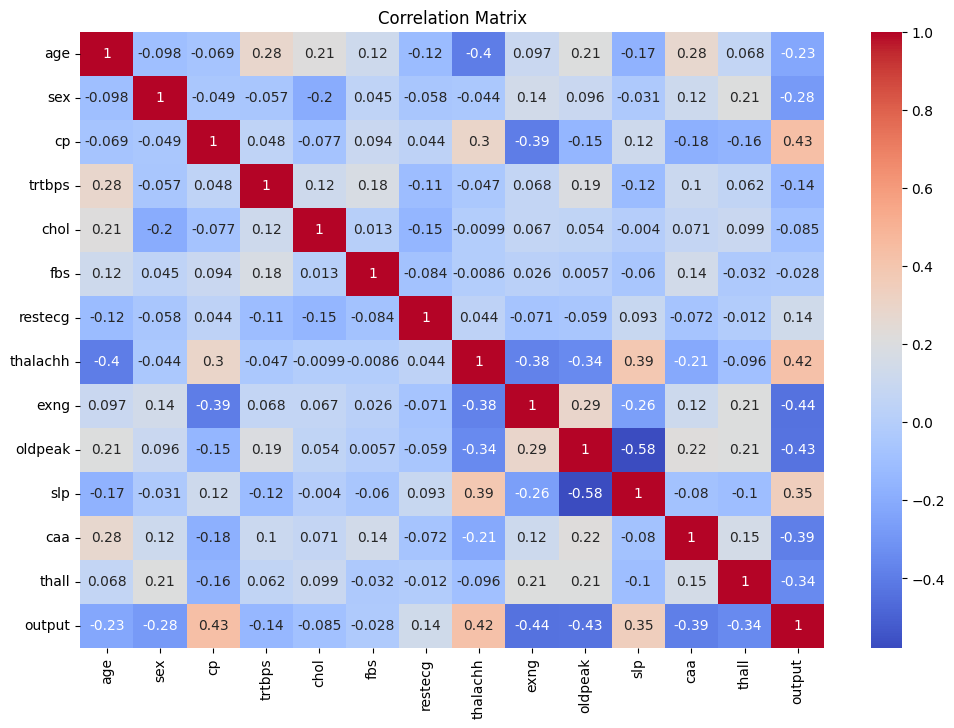

In [5]:
# Correlation Heat map 
CorrMatrix= dataframe.corr()
plt.figure(figsize=(12,8))
sns.heatmap(CorrMatrix, annot=True , cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [11]:
#Dropping target variable
features = dataframe.drop(dataframe.columns[-1] , axis=1)
#Standardization
scaler= StandardScaler()
feature_std= scaler.fit_transform(features)

# feature_standardization now having standardized values with mean 0 and std 1

In [13]:
#PCA
pca= PCA(n_components=13)
principal_comp=pca.fit_transform(feature_std)
#pcaDF=pd.DataFrame(data=principal_comp , columns=['PC1','PC2'])
#pcaDF=pd.concat([])


In [17]:
# Variance explained ratio, singular values, comulative explained variance by each principal component


explaind_variance = pca.explained_variance_ratio_
singularValues=pca.singular_values_
Cumulative_Variance=np.cumsum(explaind_variance)

#print(f"Explained variance by each component: {explaind_variance}")
#print(f"Total variance explained by the 13 components: {explaind_variance.sum()}")


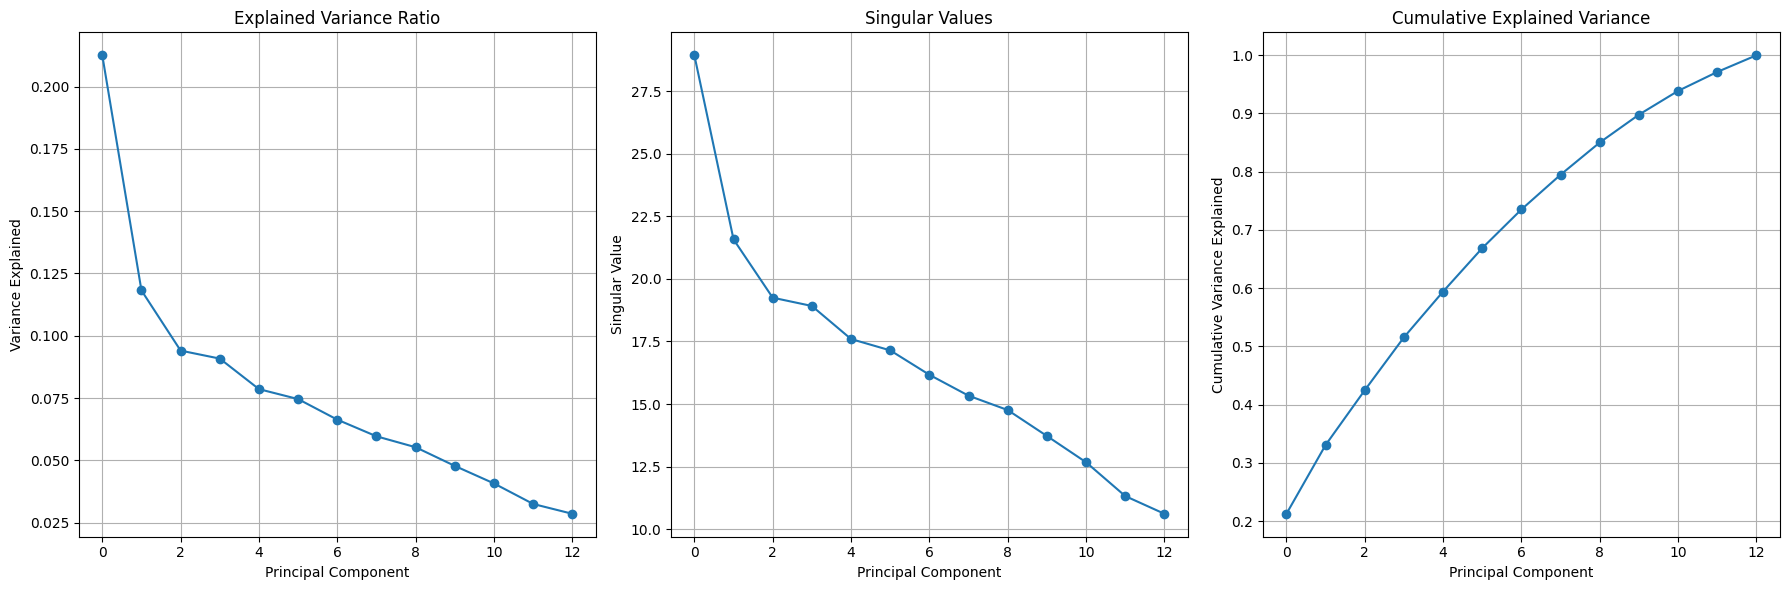

In [18]:
# Creating the subplots to visualize the explained variance, singular values, and cumulative variance
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Explained Variance Ratio Plot
ax1.grid(True)
ax1.set_title("Explained Variance Ratio")
ax1.plot(explaind_variance, marker='o')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained')

# Singular Values Plot
ax2.grid(True)
ax2.set_title("Singular Values")
ax2.plot(singularValues, marker='o')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Singular Value')

# Cumulative Explained Variance Plot
ax3.grid(True)
ax3.set_title("Cumulative Explained Variance")
ax3.plot(Cumulative_Variance, marker='o')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()
